## Bank Personal Loan Targeting

### Case Study Scenario
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget.

In [60]:
## importing relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplot
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib.pyplot import figure, show
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [222]:
## Reading Bank Data
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

### Initial Inspection of Data

In [208]:
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zip_bkt
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0,1
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0,4
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0,4
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1,1


In [209]:
print("Number of columns:", data.shape[1])
print("Number of rows:", data.shape[0],"\n")
print("Column wise data type description and Null Values\n")
data.info()

Number of columns: 15
Number of rows: 5000 

Column wise data type description and Null Values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
zip_bkt               5000 non-null int64
dtypes: float64(1), int64(14)
memory usage: 586.0 KB


In [210]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,zip_bkt
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.00000
mean,2500.500000,45.338400,20.119600,73.774200,93168.641600,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000,2.79840
std,1443.520003,11.463166,11.440484,46.033729,1760.025386,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637,1.70151
min,1.000000,23.000000,0.000000,8.000000,90000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,3.00000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000,4.00000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6.00000


Observations: 
- There are 14 columns, all numeric
- There are no null values present in the dataset
- Personal Loan,Securities Account, CD Account, Online, CreditCard are binary variables and should analysed as   categorical type
- 'Personal Loan' is our target variable for this problem statement
- Negative values present in 'Experience', which should be imputed
- Four Digit ZIP Codes present which should be imputed

### Data Exploration

In [223]:
## Separating Continous Variables from Categorical
num_cat_var = data[['Personal Loan','Securities Account', 'CD Account', 'Online', 'CreditCard','Family','Education']]
num_cont_var = data[['Age','Experience','Income','CCAvg','Mortgage','ZIP Code']]

#### Univariate Analysis
 1. Continous Variables
 2. Categorical Variables
 3. ID Column

Age              AxesSubplot(0.125,0.536818;0.227941x0.343182)
Experience    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
Income        AxesSubplot(0.672059,0.536818;0.227941x0.343182)
CCAvg               AxesSubplot(0.125,0.125;0.227941x0.343182)
Mortgage         AxesSubplot(0.398529,0.125;0.227941x0.343182)
ZIP Code         AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

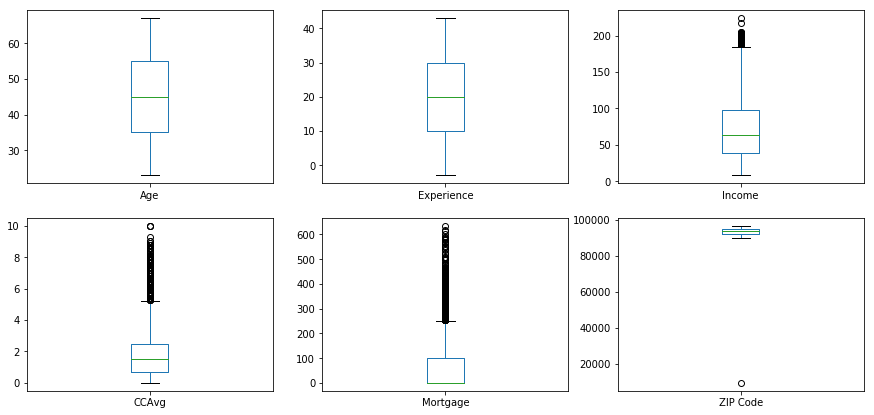

In [251]:
## Univariate Analysis of Continous Variables
num_cont_var.plot.box(subplots =True, layout = (2,3), figsize = (15,7))

Observations:
- Income, CCAvg, Mortgage and Zip Code have outliers
- Mortgage is unsymetrically distributed. Most customers have 0 mortgage

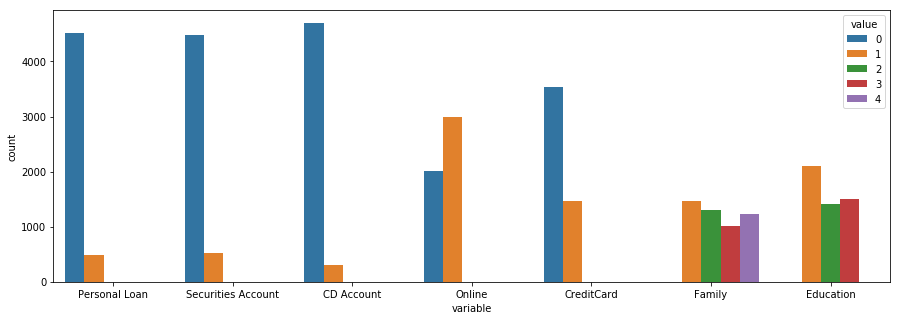

In [215]:
## Univariate Analysis of Categorical Variables
df = pd.melt(num_cat_var)
figure(figsize=(15,5))
sns.countplot(data=df, x='variable', hue='value');

Observations:
- The target variable 'Personal Loan' is an unbalanced column with majority customers having not opted for Personal Loan in the previous campaign
- Most customers do not have a CD Account or Securities Account
- Larger number of customers use Online banking service
- Majority customers in the dataset do not own a credit card
- Large portion of the customers have an Education qualification upto an Undergraduation Degree
- Majority customers are Single or Married without children ( Family size 1 and 2)

In [216]:
## Exploring ID Column
data['ID'].nunique()

5000

Since ID column has all unique values in the dataset, we should drop this variable while creating a model

#### Bivariate Analysis

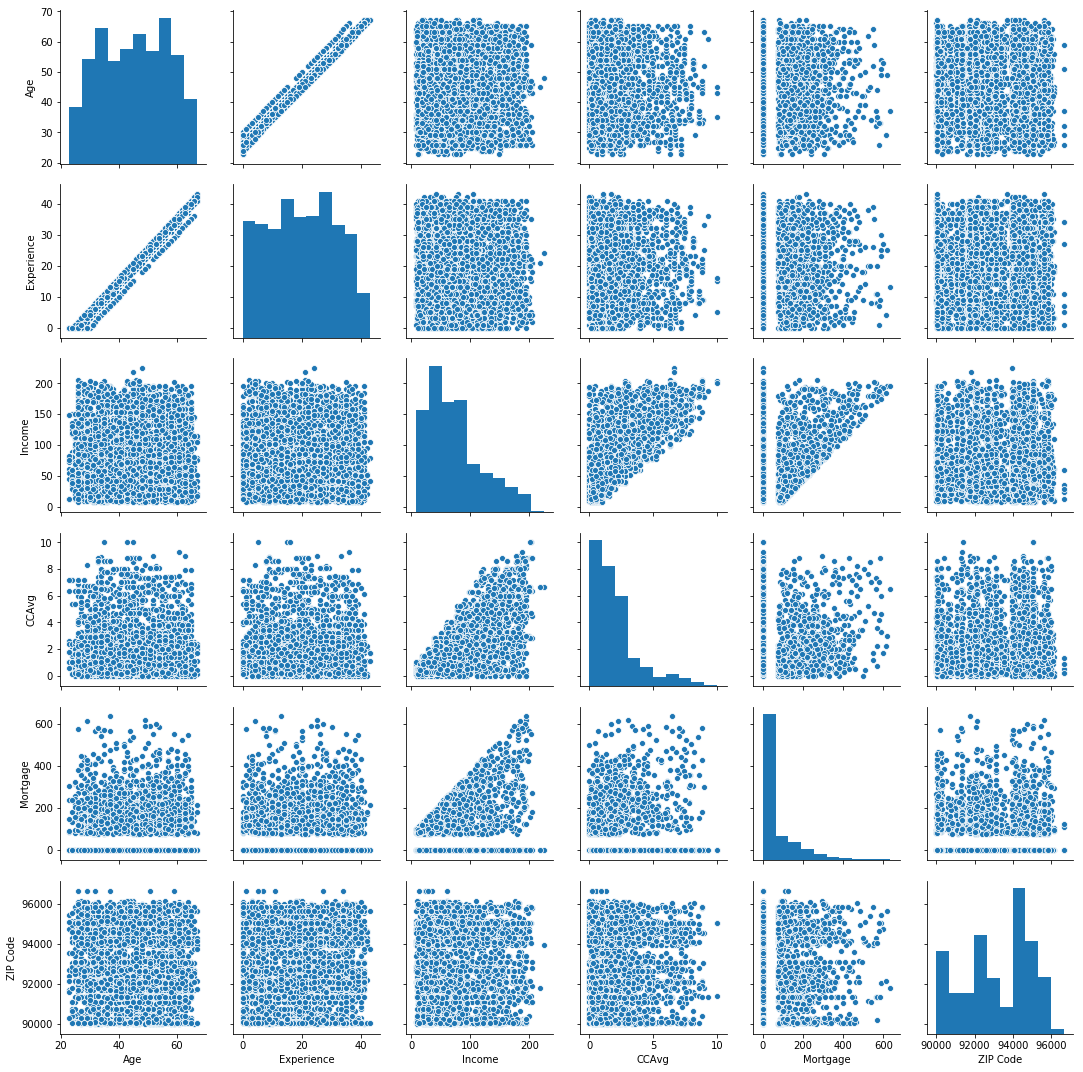

In [217]:
## Bivariate Analysis of Continous Variables 
sns.pairplot(num_cont_var);

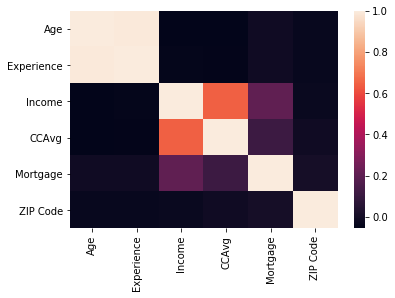

In [218]:
sns.heatmap(num_cont_var.corr());

Observations
- Income & CCAvg are positively correlated  and Age & Experience are *strongly* positively correlated
- For low Income, CCAvg is low with small variability. However, as Income increases, the CCAvg spend increases with higher variablility
- Higher income customers have higher value of mortgage

#### Target Variable Analysis

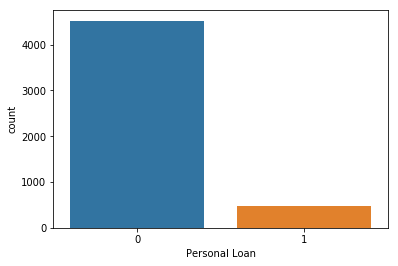

In [219]:
## Analysing Target Variable Counts
sns.countplot(data['Personal Loan']);

- The target variable is unbalanced, that is, there are very few records with customers that have opted for customer loan (Personal Loan =1) as compared to customers who have not (Personal Loan =0)

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


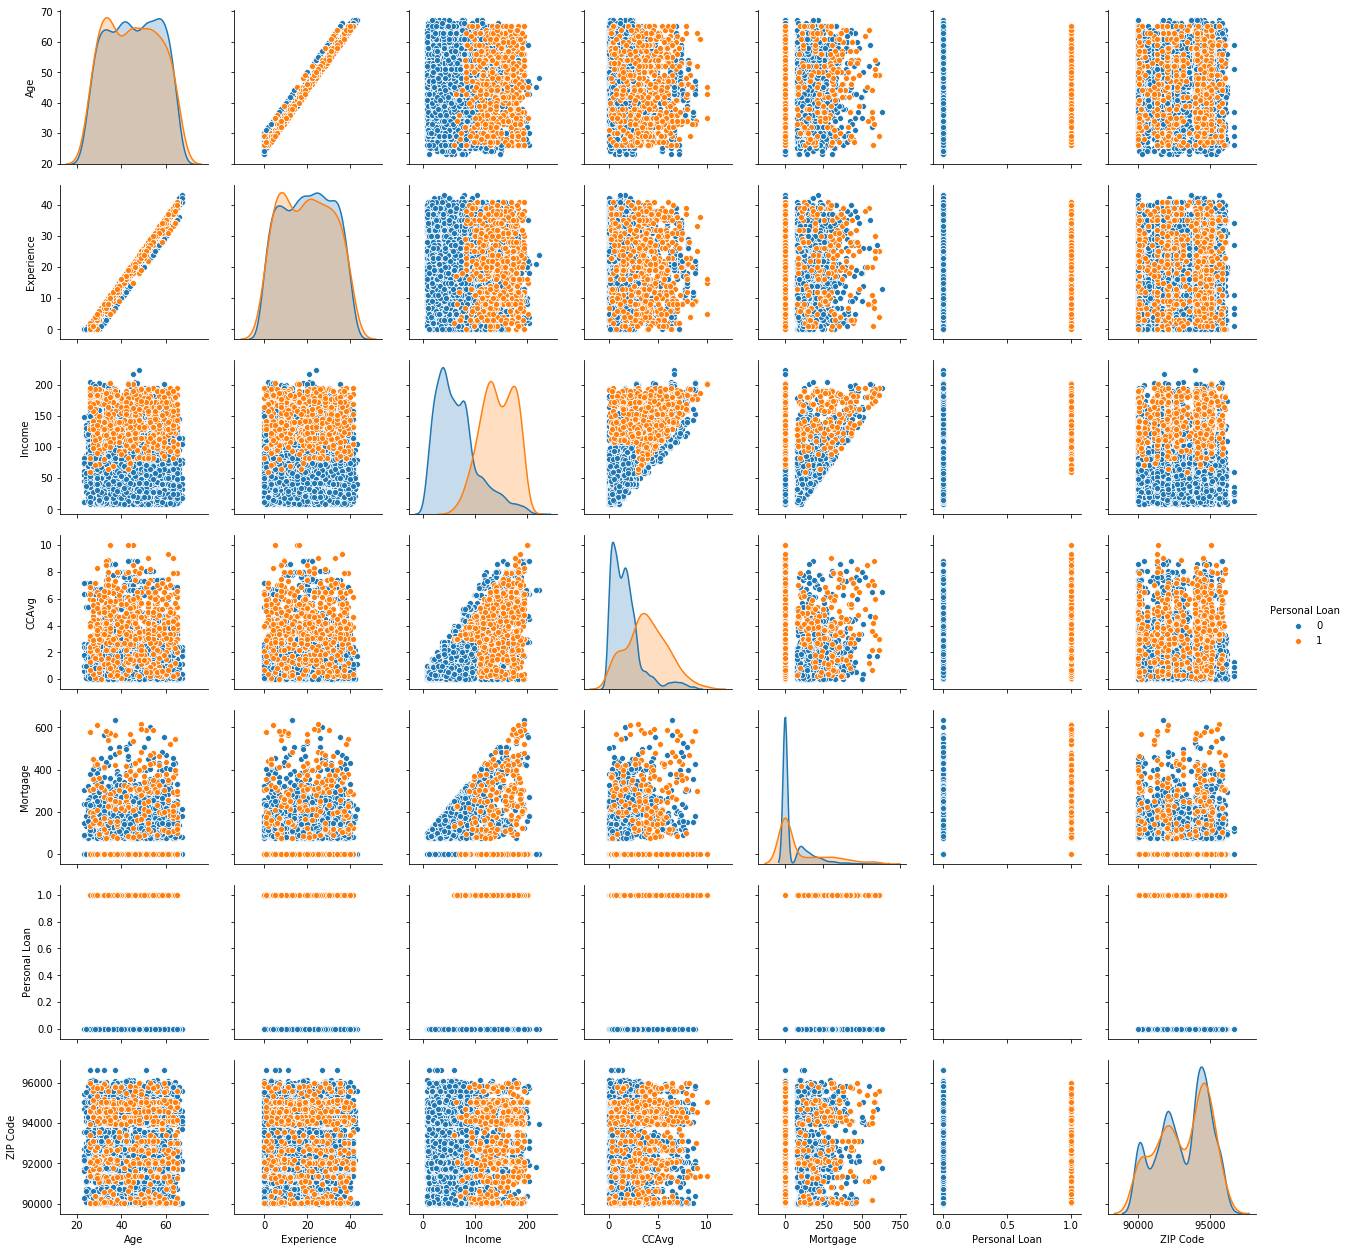

In [199]:
## Target Variable distribution wrt Numerical features
sns.pairplot(data = data[['Age','Experience','Income','CCAvg','Mortgage','Personal Loan',"ZIP Code"]], hue = 'Personal Loan');

Observations: 
- Customers that take a loan usually have higher Experience and Income
- On visual inspection of scatterplots, there seems to be a lot of overlap among the points and thus may not be classified well by techniques used for linearly separable data

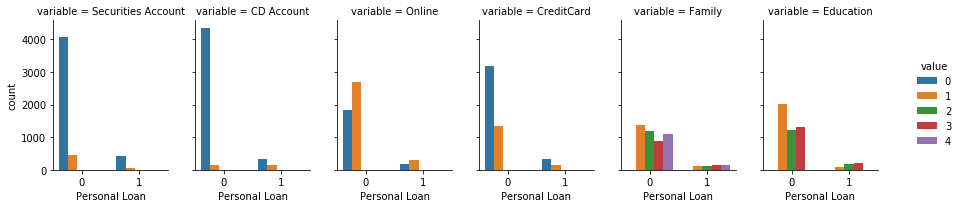

In [220]:
df = pd.melt(num_cat_var,id_vars=['Personal Loan'])
sns.catplot(kind ='count', x='Personal Loan', data = df, hue = 'value', col='variable',
            aspect = 0.7 , height = 3,legend=True,margin_titles=True);

No significant relation between Categorical variables and Target

### Anomalous Records Handling

As seen above, there are no null values present in the dataset. However, 'Experience' column has negative values, which is incorrect and hence should be imputed. Similarly, ZIP Code Column has one record with 4 digits, which again is incorrect and must be imputed

In [224]:
print("Number of negative Experience value records in the data =",data[data['Experience']<0]['Experience'].count())

Number of negative Experience value records in the data = 52


In [225]:
print("Unique Negative Values Present:" ,data[data['Experience']<0]['Experience'].unique())

Unique Negative Values Present: [-1 -2 -3]


In [226]:
## Replacing Negative Experience with 0 
data['Experience'] = data['Experience'].replace([-1,-2,-3],0)

In [227]:
data[data['ZIP Code']== data['ZIP Code'].min()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25,21,9307,4,0.6,3,0,0,0,0,1,1


In [228]:
## Replacing Value with minimum 5 digit Zip Code
data['ZIP Code'] = data['ZIP Code'].replace(9307,90000)

### Classification Models

In [229]:
## Creating Train and Test Datasets
X = data.drop(['ID','Personal Loan'],axis =1)
y = data['Personal Loan']
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size =0.3, random_state =1)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((3500, 12), (1500, 12), (3500,), (1500,))

#### Logistic Regression 

In [230]:
##Fitting the model
logistic_model = LogisticRegression(solver="liblinear")
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [231]:
## Prediction and Performance on Test Data
y_pred = logistic_model.predict(X_test)

In [232]:
## Print Performance Summary for the model
print("Accuracy: ", metrics.accuracy_score(y_pred,y_test)*100,"%\n")
print("Classification Report: \n",metrics.classification_report(y_pred,y_test))

Accuracy:  90.73333333333333 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.93      0.95      1424
           1       0.29      0.57      0.38        76

   micro avg       0.91      0.91      0.91      1500
   macro avg       0.63      0.75      0.67      1500
weighted avg       0.94      0.91      0.92      1500



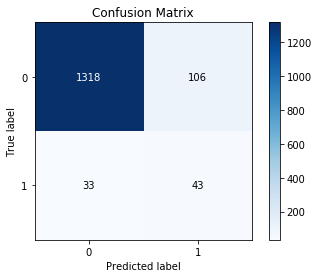

In [233]:
## Print confusion matrix
skplot.metrics.plot_confusion_matrix(y_pred,y_test);

Observations:
 - The logistic Regression Model performs with an accuracy of 90.73%. 
 - Since this is a case of unbalanced target variables,the accuracy would tend to be high. However, it is important to have a high F score value for a good model. In this case, the F-score for positive class is low, and thus the model is not good at correctly classifying the positive class

#### KNN Classification Model

In [240]:
## Scaling Numeric Variables for KNN 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

ct = ColumnTransformer([
        ('scaler', StandardScaler(), ['Age','Experience','Income','CCAvg','Mortgage','ZIP Code'])
    ], remainder='passthrough')
X_train_scaled = ct.fit_transform(X_train)
X_test_scaled = ct.fit_transform(X_test)
X_train_scaled.shape,X_test_scaled.shape

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


((3500, 12), (1500, 12))

In [241]:
## Setting Value of K
error = []
for i in range(1,50):
    knn_model = KNeighborsClassifier(n_neighbors= i , weights = 'distance' )
    knn_model.fit(X_train, y_train)
    prediction_i = knn_model.predict(X_test)
    error.append(np.mean(prediction_i!=y_test))

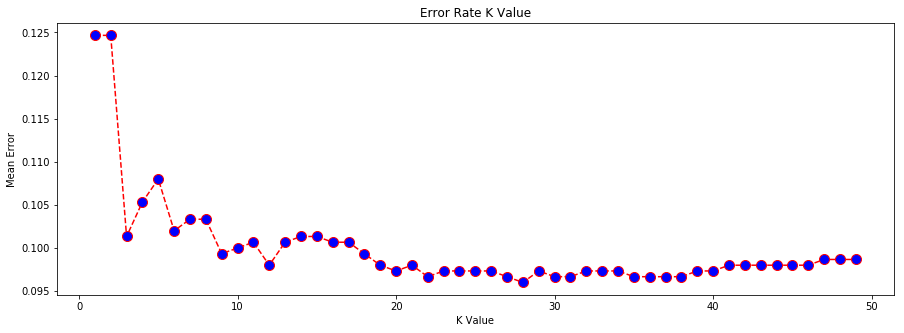

In [242]:
plt.figure(figsize=(15, 5))
plt.plot(range(1, 50), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error');

K=20 seems to be the best value for which the error is low as well as consistent over a larger number of K values

In [243]:
## Fitting the model
knn_model = KNeighborsClassifier(n_neighbors= 20 , weights = 'distance' )
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=20, p=2,
           weights='distance')

In [244]:
## Prediction and Performance on Test Data
y_pred = knn_model.predict(X_test_scaled)

In [245]:
##Performance on Test Dataset
print("Accuracy: ", metrics.accuracy_score(y_pred,y_test)*100,"%\n")
print("Classification Report: \n",metrics.classification_report(y_pred,y_test))

Accuracy:  94.13333333333334 %

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97      1437
           1       0.42      0.98      0.58        63

   micro avg       0.94      0.94      0.94      1500
   macro avg       0.71      0.96      0.78      1500
weighted avg       0.97      0.94      0.95      1500



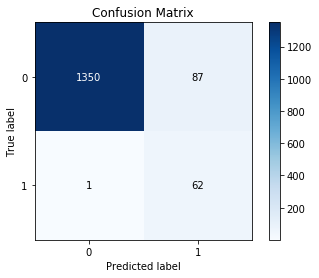

In [246]:
## Print confusion matrix
skplot.metrics.plot_confusion_matrix(y_pred,y_test);

Observations:
 - The KNN Model performs with an accuracy of 94.13%. 
 
 - Since this is a case of unbalanced target variables,the accuracy would tend to be high. However, it is important to have a high F score value for a good model. In this case, the F-score for positive class is reasonably high implying that the model is good at correctly classifying the positive class
 
 - We can see in the confusion matrix that the model is able to identify Positive Classes very well, as there is only 1 misclassification of the Positive Class

#### Naive Bayes Classification Model

In [247]:
## Fitting Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [248]:
## Prediction and Performance on Test Data
y_pred = nb_model.predict(X_test)
y_pred_proba = nb_model.predict_proba(X_test)[:,1]

In [249]:
##Performance on Test Dataset
print("Accuracy: ", metrics.accuracy_score(y_pred,y_test)*100,"%\n")
print("Classification Report: \n",metrics.classification_report(y_pred,y_test))

Accuracy:  88.06666666666668 %

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93      1300
           1       0.57      0.42      0.49       200

   micro avg       0.88      0.88      0.88      1500
   macro avg       0.74      0.69      0.71      1500
weighted avg       0.87      0.88      0.87      1500



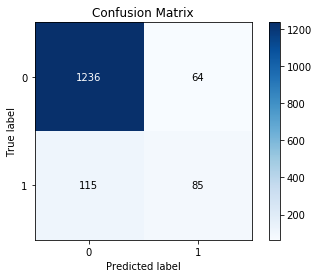

In [250]:
## Print confusion matrix
skplot.metrics.plot_confusion_matrix(y_pred,y_test);

Observations:
 - The Naive Bayes Model performs with an accuracy of 88.1%. 
 
 - Since this is a case of unbalanced target variables,the accuracy would tend to be high. However, it is important to have a high F score value for a good model. In this case, the F-score for positive class is low implying that the model is not good at correctly classifying the positive class

### Performance Summary and Observations

#### Accuracy:
     - Logistic Regression  : 90.73%
     - KNearest Neighbours  : 94.13%
     - Naive Bayes          : 88.06%

####  Observations:
- Naive Baye's has the least accuracy on test data. This could be because the dataset has an imbalanced target variable. Since Naive Bayes is based on probabilities of each of the target classes, having lesser number of positive class records in the data affects it's performance


- Logistic Model performs second best among all the techniques. The lowered performance could be due to the presence of strong correlation among some features (Income & CCAvg, Age & Experience) and presence of outliers. 


- KNN is the best performing method. Infact, looking at the confusion matrix, only 1 positive case is misclassified by the model. One reason for KNNs good performance could be the fact that the data is not linearly separable ( Refer to Target Variable distribution wrt Numerical features).  KNN can classify non linearly separable data better than Logistic Regression and hence is able to classify better in this scenario
